# Problem 1.3

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
from scipy.stats import multivariate_normal
import pandas as pd
from random import random
from sklearn import metrics

In [2]:
wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', delimiter= ';',index_col='quality')
#display(Wine)
#wine.quality = wine.quality - 3 #normalise down to 0 (since missing data)
#wine.sort_values(by=['quality'])

In [3]:
# Generate PDFs 
wine_pdfs = []
means = []
covs = []
label_list = wine.index.unique().tolist()
#df1 = df1.drop(columns=["quality"])
for label in label_list:
    L = wine.loc[label,:]
    cov = L.cov().to_numpy()
    cov += 1
    covs.append(cov)
    mean = L.mean(axis=0).to_numpy()
    means.append(mean)
    pdfx1 = multivariate_normal.pdf(L, mean, cov)
    wine_pdfs.append(pdfx1)


LinAlgError: When `allow_singular is False`, the input matrix must be symmetric positive definite.

In [34]:
# Generate class Priors 
class_priors = (11,1)
class_priors = np.zeros(class_priors)
for i in range (len(class_priors)):
    class_priors[i] = (len(wine[wine.quality == i]))/ (len(wine.index))
    #class_priors[i] = (len(wine[wine.quality == i]))

Text(0.5, 0, 'Alcohol Content')

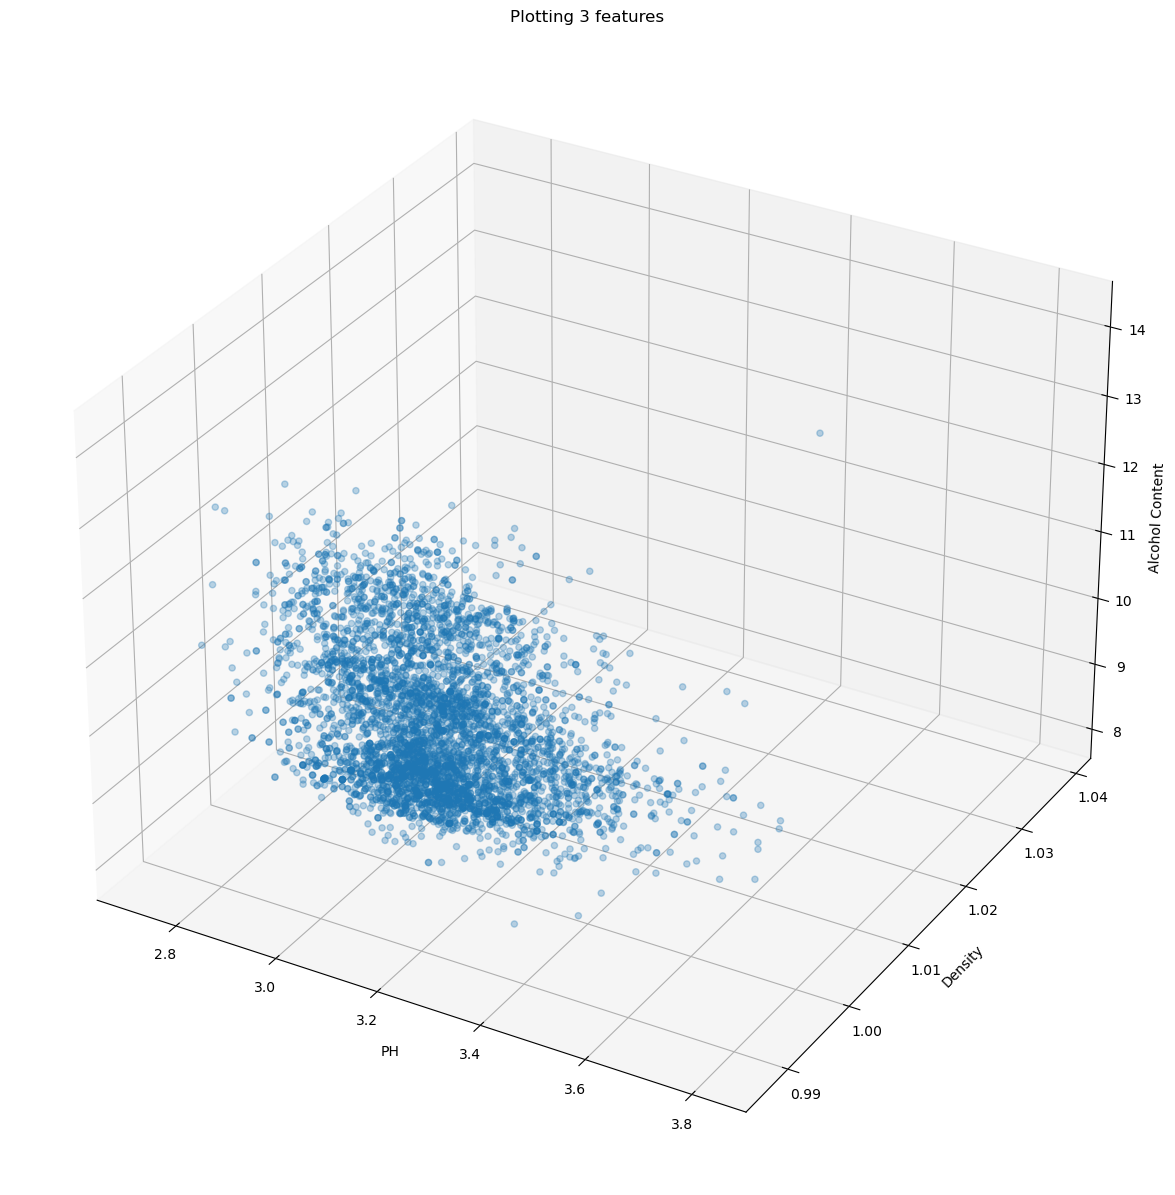

In [10]:
fig = plt.figure(figsize = (15, 15))
ax = plt.axes(projection ="3d")
ax.scatter3D(wine.pH, wine.density, wine.alcohol, alpha = 0.3)
plt.title("Plotting 3 features")
ax.set_xlabel('PH')
ax.set_ylabel('Density')
ax.set_zlabel('Alcohol Content')

In [9]:
human_test = pd.read_csv('X_test.txt')
human_train = pd.read_csv('X_train.txt')
